In [1]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import seaborn as sn # para visualização dos resultados
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
# Importando os dados sobre os passageiros do Titanic
titanic = pd.read_csv("titanic3.csv")

# Exibindo as primeiras linhas do dado
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# Cria um dataframe com algumas variáveis escolhidas
titanic_df = pd.DataFrame(titanic, columns=['sex','age','fare','survived'])
titanic_df.head(3)

,sex,age,fare,survived
0,female,29.00,211.3375,1
1,male,0.92,151.5500,1
2,female,2.00,151.5500,0


In [6]:
# Tipos dos dados
titanic_df.dtypes

sex          object
age         float64
fare        float64
survived      int64
dtype: object

In [23]:
titanic_df.describe()

,age,fare,survived
count,1046.000000,1308.000000,1309.000000
mean,29.881138,33.295479,0.381971
std,14.413493,51.758668,0.486055
min,0.170000,0.000000,0.000000
25%,21.000000,7.895800,0.000000
50%,28.000000,14.454200,0.000000
75%,39.000000,31.275000,1.000000
max,80.000000,512.329200,1.000000


In [24]:
# Mostra os valores nulos em cada coluna
titanic_df.isnull().sum()

sex           0
age         263
fare          1
survived      0
dtype: int64

In [13]:
# Utilizando a mediana nos dados faltantes
titanic_mediana = titanic_df.fillna(titanic_df[['age','fare']].median())
titanic_mediana.head()

,sex,age,fare,survived
0,female,29.00,211.3375,1
1,male,0.92,151.5500,1
2,female,2.00,151.5500,0
3,male,30.00,151.5500,0
4,female,25.00,151.5500,0


In [14]:
# Mostra os valores nulos em cada coluna
titanic_mediana.isnull().sum()

sex         0
age         0
fare        0
survived    0
dtype: int64

In [16]:
# Conversão da coluna sexo em binário
titanic_mediana['sex']=pd.get_dummies(titanic_mediana.sex)
titanic_mediana.head()

,sex,age,fare,survived
0,0,29.00,211.3375,1
1,1,0.92,151.5500,1
2,0,2.00,151.5500,0
3,1,30.00,151.5500,0
4,0,25.00,151.5500,0


In [18]:
# Visualizar a contagem de sobreviventes = 1 e não sobreviventes = 0
titanic_mediana['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

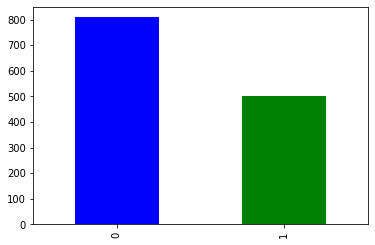

In [19]:
titanic_mediana['survived'].value_counts().plot(kind="bar", color = ["b","g"])

In [20]:
# Visualizar a contagem de sexo
titanic_mediana['sex'].value_counts()

1    843
0    466
Name: sex, dtype: int64

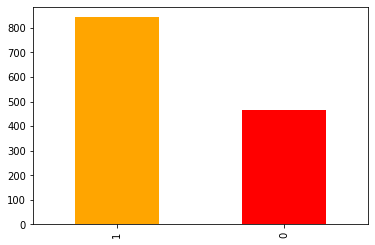

In [21]:
titanic_mediana['sex'].value_counts().plot(kind="bar", color = ["orange", "r"])

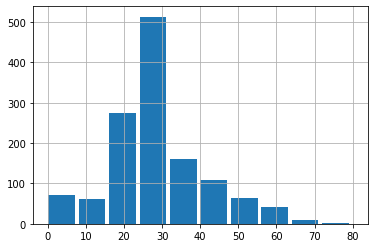

In [22]:
# Histograma da distribuição de idade dos passageiros
titanic_mediana["age"].hist(width=7)

In [25]:
def survival_stacked_bar(variable):
    Died = titanic_mediana[titanic_mediana["survived"]==0][variable].value_counts()/len(titanic_mediana["survived"]==0)
    Survived = titanic_mediana[titanic_mediana["survived"]==1][variable].value_counts()/len(titanic_mediana["survived"]==1)
    
    data = pd.DataFrame([Died,Survived])
    data.index=["Não sobreviveu","Sobreviveu"]
    data.plot(kind="bar",stacked=True,title="Porcentagem")
    
    return data.head()

In [26]:
titanic_mediana['sex']
titanic_mediana.head(3)

,sex,age,fare,survived
0,0,29.00,211.3375,1
1,1,0.92,151.5500,1
2,0,2.00,151.5500,0


,0,1
Não sobreviveu,0.097021,0.521008
Sobreviveu,0.258976,0.122995


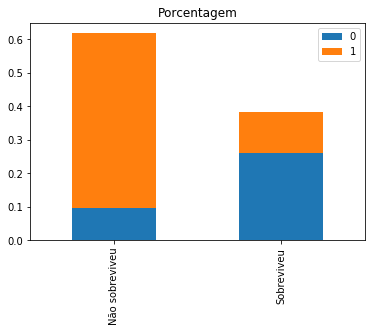

In [27]:
# Utiliza a função criada acima com a variável Sexo 0=Masculino e 1=Feminino
survival_stacked_bar("sex")

In [28]:
# Próximo à -1 - quando 1 sobe outro desce
# Próximo à 0 - correlação ótima
# Próximo à 1 - quando 1 sobe o outro sobe
titanic_mediana.corr()

,sex,age,fare,survived
sex,1.000000,0.053663,-0.185681,-0.528693
age,0.053663,1.000000,0.178182,-0.043817
fare,-0.185681,0.178182,1.000000,0.244414
survived,-0.528693,-0.043817,0.244414,1.000000


In [29]:
# Descrever minhas variáveis preditores e alvo
preditores = titanic_mediana[['sex','age','fare']]
alvo = titanic_mediana['survived']

In [30]:
# Divisão dos conjuntos de treino e teste

preditores_treino, preditores_teste, alvo_treino, alvo_teste = train_test_split(preditores, alvo, test_size=0.30, random_state=0)

In [31]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression()

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(preditores_treino, alvo_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
alvo_pred = modelo_reglog.predict(preditores_teste)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# Matriz de confusão
print(confusion_matrix(alvo_teste, alvo_pred))

[[206  40]
 [ 49  98]]


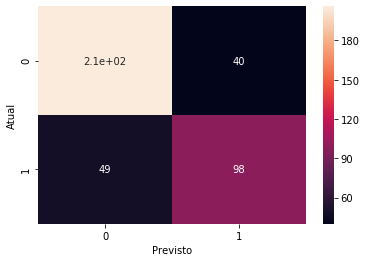

In [33]:
matriz_confusao = pd.crosstab(alvo_teste, alvo_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [34]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(alvo_teste, alvo_pred))

Acurácia:  0.7735368956743003


In [35]:
print('Precisão: ', metrics.precision_score(alvo_teste, alvo_pred))

print('Revocação: ', metrics.recall_score(alvo_teste, alvo_pred))

print('F1-Measure: ', metrics.f1_score(alvo_teste, alvo_pred))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, alvo_pred))

Precisão:  0.7101449275362319
Revocação:  0.6666666666666666
F1-Measure:  0.6877192982456141
ROC AUC:  0.7520325203252032


In [36]:
print(alvo_teste)
print(alvo_pred)

1139    0
533     1
459     0
1150    0
393     0
1189    1
5       1
231     1
330     0
887     1
531     0
790     0
427     1
1260    1
251     1
486     0
436     1
31      1
186     1
1051    0
769     0
642     0
1087    0
55      1
678     0
358     1
503     1
995     0
1005    0
1279    0
       ..
1157    0
936     1
467     1
97      1
1003    1
1253    0
1140    0
196     1
883     0
183     1
1270    0
431     0
526     1
815     0
933     0
1206    0
175     0
1292    0
81      0
267     0
77      0
1225    0
452     1
895     1
900     0
914     0
580     1
1080    1
1249    0
88      1
Name: survived, Length: 393, dtype: int64
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0

# Árvore de Decisão

In [37]:
print("Preditores Treino")
print(preditores_treino)

print("Preditores Teste")
print(preditores_teste)

print("Alvo Treino")
print(alvo_treino)

print("Alvo Teste")
print(alvo_teste)

Preditores Treino
      sex    age      fare
501     0  13.00   19.5000
588     0   4.00   23.0000
402     0  30.00   13.8583
1193    1  28.00    7.7250
686     0  22.00    7.7250
971     1  28.00    7.8792
117     0  30.00   56.9292
540     0   2.00   26.0000
294     1  49.00  110.8833
261     1  35.00   26.2875
587     1   2.00   23.0000
489     0  42.00   26.0000
2       0   2.00  151.5500
405     1  18.00   13.0000
1284    1  28.00    8.0500
338     1  28.00   26.0000
356     1  25.00   13.0000
985     1  24.00    7.1417
182     0  30.00  106.4250
1027    1  28.00    8.0500
1023    0  28.00    7.8792
657     0   0.75   19.2583
891     1  33.00    8.6542
716     1  26.00   14.4542
1142    1   4.00   29.1250
520     1  20.00   13.8625
1267    0  30.00   24.1500
395     0  18.00   23.0000
905     1  32.00    7.8542
278     1  32.00   30.5000
...   ...    ...       ...
659     0   5.00   19.2583
797     1  40.50    7.7500
1286    0  38.00    7.2292
1201    1  22.00    7.2292
99      0 

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(preditores_treino, alvo_treino)

In [39]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(preditores_teste)

In [40]:
print("Acurácia: ", metrics.accuracy_score(alvo_teste, arvore_previsao))

print('Precisão: ', metrics.precision_score(alvo_teste, arvore_previsao))

print('Revocação: ', metrics.recall_score(alvo_teste, arvore_previsao))

print('F1-Measure: ', metrics.f1_score(alvo_teste, arvore_previsao))

print('ROC AUC: ', metrics.roc_auc_score(alvo_teste, arvore_previsao))

Acurácia:  0.7684478371501272
Precisão:  0.7121212121212122
Revocação:  0.6394557823129252
F1-Measure:  0.6738351254480287
ROC AUC:  0.742492118798739


[[208  38]
 [ 53  94]]


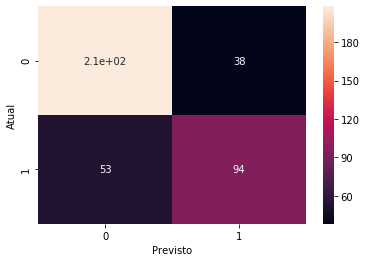

In [42]:
# Matriz de Confusão
print(confusion_matrix(alvo_teste, arvore_previsao))


matriz_confusao_arvore = pd.crosstab(alvo_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

# Floresta Aleatória

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Instanciao objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

In [45]:
# Separando a variável alvo das variáveis independentes
x = titanic_mediana.drop(["survived"],axis=1)
y = titanic_mediana["survived"]

In [46]:
# Dividindo o conjunto entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [47]:
# algumas funções para auxiliar na visulização:

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(x_test))
    col = ["Previsto Morto","Previsto Sobrevivente"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Previsto Morto","Previsto Sobrevivente"]
    cm.index=["Realmente Morto","Realmente Sobrevivente"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [49]:
# Treinamento do modelo
floresta.fit(x_train, y_train)

# Prevê a partir dos preditores de testes
predicted = floresta.predict(x_test)

In [50]:
predicted

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [51]:
# Matriz de Confusão
print(confusion_matrix(y_test, predicted))

[[177  31]
 [ 37  83]]


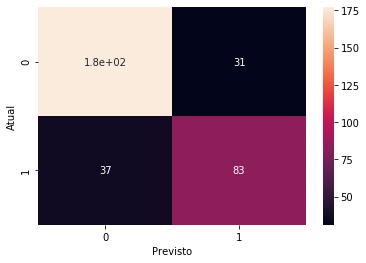

In [52]:
matriz_confusao_arvore = pd.crosstab(y_test, predicted, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

In [53]:
print("Acurácia: ", metrics.accuracy_score(y_test, predicted))

print('Precisão: ', metrics.precision_score(y_test, predicted))

print('Revocação: ', metrics.recall_score(y_test, predicted))

print('F1-Measure: ', metrics.f1_score(y_test, predicted))

print('ROC AUC: ', metrics.roc_auc_score(y_test, predicted))

Acurácia:  0.7926829268292683
Precisão:  0.7280701754385965
Revocação:  0.6916666666666667
F1-Measure:  0.7094017094017094
ROC AUC:  0.7713141025641026
